In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [14]:
def softmax(z):
    exp_z = np.exp(z)
    softmax_scores = exp_z / np.sum(exp_z)
    return softmax_scores

In [15]:
# Initializing reward states for u = 1/2/3
R = {0: np.array([1, 2, -1]), 1: np.array([8, -8]), 2: np.array([0, 4])}
# Action values
M = {0: softmax(np.zeros(len(R[0]))), 1: softmax(np.zeros(len(R[1]))), 2: softmax(np.zeros(len(R[2]))) }

def policy_evaluation(epsilon, nmb_trials, nmb_repetitions):

    # Action values
    #M = {0: softmax(np.zeros(len(R[0]))), 1: softmax(np.zeros(len(R[1]))), 2: softmax(np.zeros(len(R[2]))) }
    #V = {0: np.zeros(len(R[1])), 1: np.zeros(len(R[2])), 2: np.zeros(len(R[2])) }
    V_over_time = np.zeros((nmb_repetitions, nmb_trials, len(R.keys())))

    # Initialize predictions
    #V_over_time[0, 0, :] = 0 

    for rep in range(nmb_repetitions):
         # Initialize predictions
        V_over_time[rep, 0, :] = 0 

        for trial in range(1, nmb_trials):

            # Choosing new state
            reward_1 = np.random.choice(R[0], p=M[0])

            # Current prediction
            V = V_over_time[rep, trial-1, :]

            # Update 

            # U = 1
            if reward_1 == R[0][0]: # Choice left
                V[0] = V[0] + epsilon * (reward_1 + 0 -  V[0])           
            elif reward_1 == R[0][1]: # Choice right
                V[0] = V[0] + epsilon * (reward_1 + 0 -  V[0])           

            # Choice center                    
            elif reward_1 == R[0][2]:
                # Random choice u=2 or u=3
                V[0] = V[0] + epsilon * (reward_1 + 1/2 * (V[1]+ V[2]) -  V[0])
                # u=2
                if np.random.choice([0,1]):
                    reward_2 = np.random.choice(R[1])

                    #V[1] = V[1] + epsilon * (reward_2 + M[1] @ R[1] - V[1])
                    V[1] = V[1] + epsilon * (reward_2 - V[1])
                
                # u=3
                else:
                    reward_2 = np.random.choice(R[2])
                    #V[2] = V[2] + epsilon * (reward_2 + M[2] @ R[2] - V[2])
                    V[2] = V[2] + epsilon * (reward_2 - V[2])

                #V[0] = V[0] + epsilon * (reward_1 + reward_2 -  V[0])
            
            V_over_time[rep, trial, :] = V

    return V_over_time



0.9933885801500754


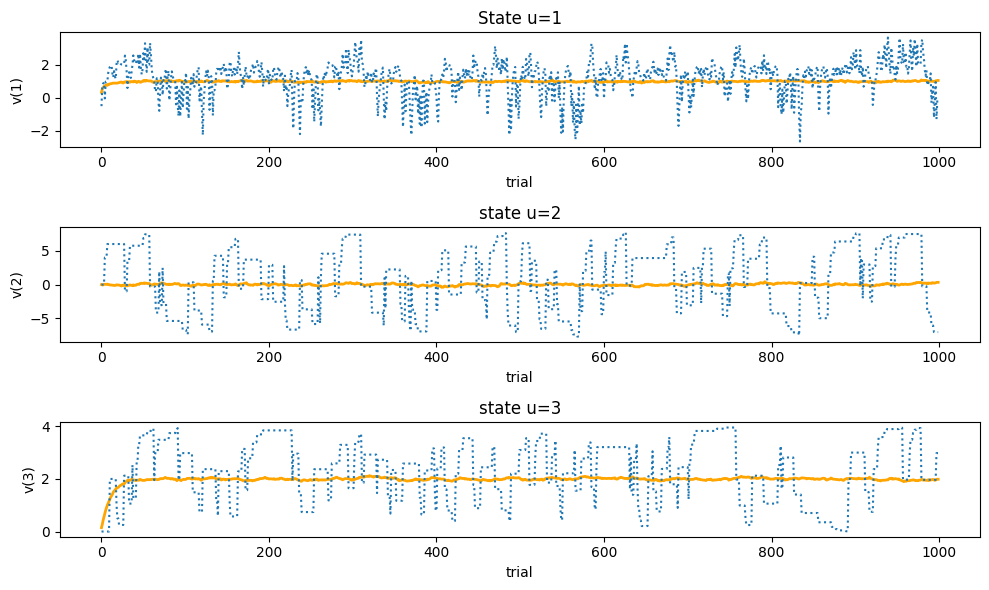

In [16]:
V_over_time = policy_evaluation(0.5, 1000, 1000)

v_1 = V_over_time[:, :, 0]
v_1_mean = np.mean(v_1, axis=0)
v_2 = V_over_time[:, :, 1]
v_2_mean = np.mean(v_2, axis=0)
v_3 = V_over_time[:, :, 2]
v_3_mean = np.mean(v_3, axis=0)

print(np.mean(v_1_mean))

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(v_1_mean, linewidth=2, color='orange')
plt.plot(V_over_time[0,:,0], linestyle='dotted')
plt.title('State u=1')
plt.ylabel('v(1)')
plt.xlabel('trial')


plt.subplot(3, 1, 2)
plt.plot(v_2_mean, linewidth=2, color='orange')
plt.plot(V_over_time[0,:,1], linestyle='dotted')
plt.title('state u=2')
plt.ylabel('v(2)')
plt.xlabel('trial')

plt.subplot(3, 1, 3)
plt.plot(v_3_mean, linewidth=2, color='orange')
plt.plot(V_over_time[0,:,2], linestyle='dotted')
plt.title('state u=3')
plt.ylabel('v(3)')
plt.xlabel('trial')

plt.tight_layout()
#plt.savefig('NM_pl_eval_big', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Initializing reward states for u = 1/2/3
R = [np.array([1, 2, -1]), np.array([8, -8]), np.array([0, 4])]


def actor_critic(epsilon, epsilon_a, nmb_trials, nmb_repetitions):
    decay = 0
    V_over_time = np.zeros((nmb_repetitions, nmb_trials, 3))
    M_over_time_1 = np.zeros((nmb_repetitions, nmb_trials, 3))
    M_over_time_2 = np.zeros((nmb_repetitions, nmb_trials, 2))
    M_over_time_3 = np.zeros((nmb_repetitions, nmb_trials, 2))
    P_over_time_1 = np.zeros((nmb_repetitions, nmb_trials, 3))
    P_over_time_2 = np.zeros((nmb_repetitions, nmb_trials, 2))
    P_over_time_3 = np.zeros((nmb_repetitions, nmb_trials, 2))

    for rep in range(nmb_repetitions):
        # Current prediction
        V = np.zeros(3)
        # Current action values
        P_1 = softmax(np.zeros(len(R[0])))
        P_2 = softmax(np.zeros(len(R[1])))
        P_3 = softmax(np.zeros(len(R[2])))

        M_1 = np.zeros(len(R[0]))
        M_2 = np.zeros(len(R[1]))
        M_3 = np.zeros(len(R[2]))

        for trial in range(0, nmb_trials):

            # Choosing new state
            reward_1 = np.random.choice(R[0], p=P_1)

            # Update 

            # u = 1
            if reward_1 == R[0][0]: # Choice left
                # Update prediction
                V[0] = V[0] + epsilon * (reward_1 + 0 - V[0])

                # Update action values
                for i, action_val in enumerate(M_1):
                    if i == 0:
                        M_1[i] = (1-decay) * M_1[i] + epsilon_a * (reward_1 + 0 - V[0])
                    else:
                        M_1[i] = (1-decay) * M_1[i]

                P_1 = softmax(M_1) 


            elif reward_1 == R[0][1]: # Choice right
                V[0] = V[0] + epsilon * (reward_1 + 0 -  V[0])

                # Update action values
                for i, action_val in enumerate(M_1):
                    if i == 1:
                        M_1[i] = (1-decay) * M_1[i] + epsilon_a * (reward_1 + 0 - V[0])
                    else:
                        M_1[i] = (1-decay) * M_1[i]

                P_1 = softmax(M_1)
           
            # Choice center                    
            elif reward_1 == R[0][2]:
                #random if you go to 2 or 3
                choice = np.random.choice([0,1])
                next_state = choice +1

                # Update prediction
                V[0] = V[0] + epsilon * (reward_1 + V[next_state] - V[0])

                # Update action values
                for i, action_val in enumerate(M_1):
                    if i == 2:
                        M_1[i] = (1-decay) * M_1[i] + epsilon_a * (reward_1 + V[next_state] - V[0])
                    else:
                        M_1[i] = (1-decay) * M_1[i]

                P_1 = softmax(M_1)

                # Random choice u=2 or u=3
                if choice == 0:
                    
                    # u=2
                    reward_2 = np.random.choice(R[1], p=P_2)

                    # Update prediction
                    V[1] = V[1] + epsilon * (reward_2 - V[1])

                    if reward_2 == R[1][0]: # Choice left

                    # Update action values
                        for i, action_val in enumerate(M_2):
                            if i == 0:
                                M_2[i] = (1-decay) * M_2[i] + epsilon_a * (reward_2 + 0 - V[1])
                            else:
                                M_2[i] = (1-decay) * M_2[i]

                        P_2 = softmax(M_2)

                    elif reward_2 == R[1][1]: # Choice right

                    # Update action values
                        for i, action_val in enumerate(M_2):
                            if i == 1:
                                M_2[i] = (1-decay) * M_2[i] + epsilon_a * (reward_2 + 0 - V[1])
                            else:
                                M_2[i] = (1-decay) * M_2[i]

                        P_2 = softmax(M_2)
                
                else:
                    # u=3
                    reward_2 = np.random.choice(R[2], p=P_3)

                    # Update prediction
                    V[2] = V[2] + epsilon * (reward_2 - V[2])

                    if reward_2 == R[2][0]: # Choice left

                        # Update action values
                        for i, action_val in enumerate(M_3):
                            if i == 0:
                                M_3[i] = (1-decay) * M_3[i] + epsilon_a * (reward_2 + 0 - V[2])
                            else:
                                M_3[i] = (1-decay) * M_3[i]

                        P_3 = softmax(M_3)

                    elif reward_2 == R[2][1]: # Choice right

                        # Update action values
                        for i, action_val in enumerate(M_3):
                            if i == 1:
                                M_3[i] = (1-decay) * M_3[i] + epsilon_a * (reward_2 + 0 - V[2])
                            else:
                                M_3[i] = (1-decay) * M_3[i]

                        P_3 = softmax(M_3)

            M_over_time_1[rep, trial, :] = M_1
            M_over_time_2[rep, trial, :] = M_2
            M_over_time_3[rep, trial, :] = M_3

            P_over_time_1[rep, trial, :] = P_1
            P_over_time_2[rep, trial, :] = P_2
            P_over_time_3[rep, trial, :] = P_3

            V_over_time[rep, trial, :] = V


    return V_over_time, P_over_time_1, P_over_time_2, P_over_time_3


In [18]:
V, P_1, P_2, P_3 = actor_critic(0.2, 0.075, 1000, 1000)


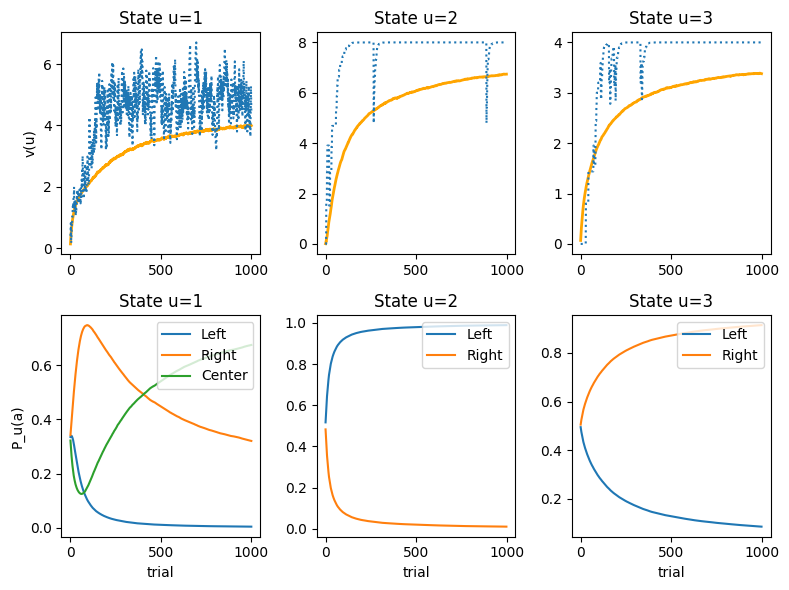

In [19]:
v_1 = V[:, :, 0]
v_1_mean = np.mean(v_1, axis=0)
v_2 = V[:, :, 1]
v_2_mean = np.mean(v_2, axis=0)
v_3 = V[:, :, 2]
v_3_mean = np.mean(v_3, axis=0)

p_1_left = P_1[:, :, 0]
p_1_left_mean = np.mean(p_1_left, axis=0)
p_1_right = P_1[:, :, 1]
p_1_right_mean = np.mean(p_1_right, axis=0)
p_1_center = P_1[:, :, 2]
p_1_center_mean = np.mean(p_1_center, axis=0)

p_2_left = P_2[:, :, 0]
p_2_left_mean = np.mean(p_2_left, axis=0)
p_2_right = P_2[:, :, 1]
p_2_right_mean = np.mean(p_2_right, axis=0)

p_3_left = P_3[:, :, 0]
p_3_left_mean = np.mean(p_3_left, axis=0)
p_3_right = P_3[:, :, 1]
p_3_right_mean = np.mean(p_3_right, axis=0)


plt.figure(figsize=(8, 6))

plt.subplot(2, 3, 1)
plt.plot(v_1_mean, linewidth=2, color='orange')
plt.plot(V[0,:,0], linestyle='dotted')
plt.title('State u=1')
plt.ylabel('v(u)')

plt.subplot(2, 3, 4)
plt.plot(p_1_left_mean, label= 'Left')
plt.plot(p_1_right_mean, label='Right')
plt.plot(p_1_center_mean, label='Center')
plt.legend(loc='upper right')
plt.title('State u=1')
plt.xlabel('trial')
plt.ylabel('P_u(a)')

plt.subplot(2, 3, 2)
plt.plot(v_2_mean, linewidth=2, color='orange')
plt.plot(V[0,:,1], linestyle='dotted')
plt.title('State u=2')

plt.subplot(2, 3, 5)
plt.plot(p_2_left_mean, label= 'Left')
plt.plot(p_2_right_mean, label='Right')
plt.legend(loc='upper right')
plt.title('State u=2')
plt.xlabel('trial')

plt.subplot(2, 3, 3)
plt.plot(v_3_mean, linewidth=2, color='orange')
plt.plot(V[0,:,2], linestyle='dotted')
plt.title('State u=3')

plt.subplot(2, 3, 6)
plt.plot(p_3_left_mean, label= 'Left')
plt.plot(p_3_right_mean, label='Right')
plt.legend(loc='upper right')
plt.title('State u=3')
plt.xlabel('trial')

plt.tight_layout()
#plt.savefig('NM_actor_critic_decay_02', dpi=300, bbox_inches='tight')
plt.show()